<h2> Nauczanie maszynowe/Ćwiczenia1

Uczenie maszynowe można podzielić na:

- Uczenie nadzorowane (z nauczycielem) - na podstawie danych $(x_i, y_i)$ uczymy się funkcji $f_{\theta}$, takiej że $y_i \approx f_{\theta}(x_i)$
- Uczenie nienadzorowane (bez nauczyciela) - na podstawie danych $(x_i)$ uczymy się $p(x;\theta) = \sum_z p(x|z;\theta)p(z;\theta)$
- Uczenie ze wzmocnieniem - uczymy się polityki $\pi(a|x)$


Będziemy zajmować się przede wszystkim  uczeniem nadzorowanym oraz nienadzorowanym. Aby wyznaczyć parametr $\theta$ rozważmy różnego typu funkcje kosztu.

W uczeniu nadzorowanym najczęsciej interesuje nas zagadnienie regresji lub klasyfikacji.

Modele dyskryminatywne a generatywne

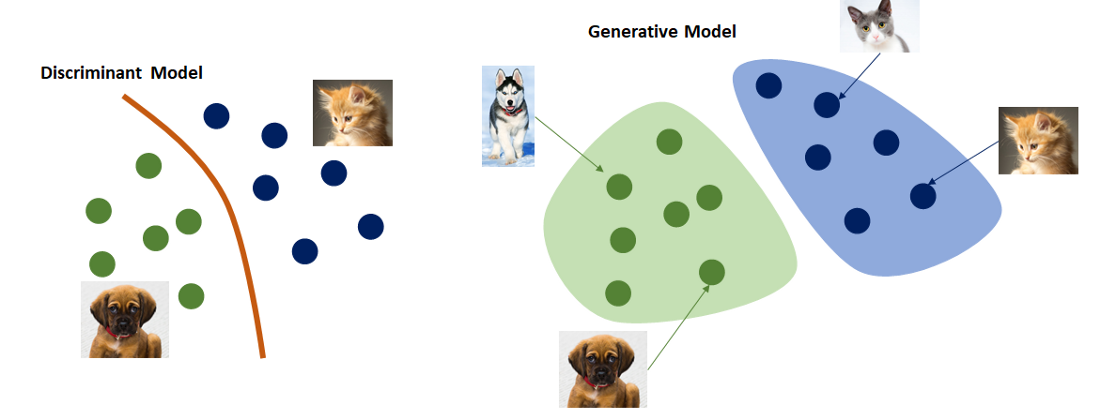

In [1]:
from IPython import display
display.Image("disc_gen.png", width="800", height="500")

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
print(boston_data['DESCR']) #opis tych danych (DESCRIPTION)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\wynal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
d = boston_data['data']
d2 = d[:, [2,5]] #wyciągamy tylko 2 cechy: INDUS, RM
target = boston_data['target']

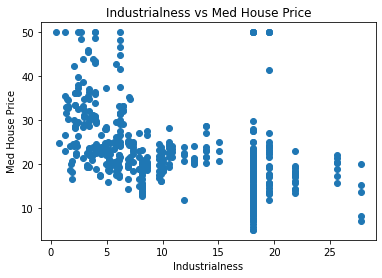

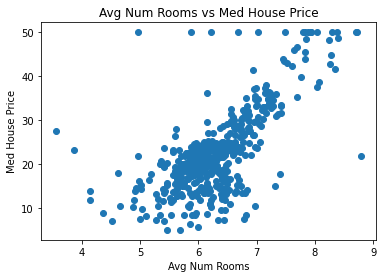

In [4]:
plt.title('Industrialness vs Med House Price')
plt.scatter(d2[:, 0], target)
plt.xlabel('Industrialness')
plt.ylabel('Med House Price')
plt.show()

plt.title('Avg Num Rooms vs Med House Price')
plt.scatter(d2[:, 1], target)
plt.xlabel('Avg Num Rooms')
plt.ylabel('Med House Price')
plt.show()

Funkcja kosztu mierzy średnią różnicę pomiędzy przewidywaniem a rzeczywistą wartością. Istnieje wiele funkcji tego typu, jedna z najpopularniejszych ma postać:

<center>
$LF(y,t) = \frac{1}{2N}\sum_{i}(y^{i}-t^{i})^2$
    
 

W przypadku regresji liniowej 2 zmiennych:
    
<center>
$LF(y,t) = \frac{1}{2N}\sum_{i}(w_1x_{1}^{i}+w_2x_{2}^{i}+w_0-t^{i})^2$

In [5]:
def loss_function(w1, w2, w0, X, t):
    """
    tutaj zdefiniuj funkcję, która przyjmuje jako argument wagi
    (w1,w2,w0), dane w postaci listy list (X) oraz wartosci (t),
    a ktora zwraca wartosc funkcji kosztu.
    """
    sum = 0.0

    for input, target in zip(X, t):
        sum += (w1 * input[0] + w2 * input[1] + w0 - target) ** 2

    return sum / (2 * len(X))


In [6]:
#przykladowe wywolanie
loss_function(3, 8, -1, d2, target)

2088.9192750474317

In [7]:
#przykladowe wywolanie
loss_function(-0.5, 8, -23, d2, target) #lepiej

20.61716585276679

<h4> Zadanie1: Uzupełnij definicję powyższej funkcji.

Często na początku nie mamy informacji o tym jakie powinny być parametry modelu; możemy zacząć od losowych wartości. Pojawia się więc pytanie jak je aktualizować aby wartości funkcji kosztu były coraz mniejsze? Jedno z najpopularnieszych podejść (i stanowiące podstawę do innych algorytmów) jest opartę o metodę spadku gradientu (Gradient Descent). Liczymy pochodną funkcji kosztu po rozważanych parametrach a następnie aktualizujemu je wg:

<center> 
$w_{new} = w_{old} - \eta \cdot \frac{d LF}{dw}$

In [8]:
def update_weigths(w1, w2, w0, X, t, eta):
    """
    tutaj zdefiniuj funkcję, która przyjmuje jako argument wagi
    (w1,w2,w0), dane (X), wartosci (t) oraz wspolczynnik uczenia
    (eta), a ktora zwraca zaktualizowane wartosci w1, w2, w0
    """
    sum_w1 = 0.0
    sum_w2 = 0.0
    sum_w0 = 0.0

    for input, target in zip(X, t):
        sum_w1 += 2 * w1 * input[0] ** 2 + 2 * w2 * input[0] * input[1] + 2 * w0 * input[0] - 2 * input[0] * target
        sum_w2 += 2 * w1 * input[0] * input[1] + 2 * w2 * input[1] ** 2 + 2 * w0 * input[1] - 2 * input[1] * target
        sum_w0 += 2 * w1 * input[1] + 2 * w2 * input[1] + 2 * w0 - 2 * target

    sum_w1 /= 2 * len(X)
    sum_w2 /= 2 * len(X)
    sum_w0 /= 2 * len(X)

    return (w1 - eta * sum_w1, w2 - eta * sum_w2, w0 - eta * sum_w0)

In [9]:
#przykladowe wywolanie
update_weigths(3, 8, -1, d2, target, 0.001)

(2.1737704910276685, 7.628145982577075, -1.0455981719367589)

<h4> Zadanie2: Uzupełnij definicję powyższej funkcji.

<h4> Zadanie3: Celem jest zbudowanie modelu regresji liniowej przeiwdującej $target$ w oparciu o $d2$. Wystartuj z początkowych parametrów 1, 1 oraz 1. Przyjmując $\eta=0.001$ wykonaj 1000 aktualizacji tych parametrów na podstawie metody gradientu. Narysuj zależność funkcji kosztu od numeru iteracji. Wykonaj analogiczne obliczenia dla $\eta=0.01$ oraz $\eta=0.00001$. Skomentuj otrzymane wyniki.

In [37]:
def plot_loss_func(eta, iterations):
    w1 = 1
    w2 = 1
    w0 = 1
    f_cost = []

    for _ in range(iterations):
        f_cost.append(loss_function(w1, w2, w0, d2, target))
        w1, w2, w0 = update_weigths(w1, w2, w0, d2, target, eta)

    print(f"w1: {w1}, w2: {w2}, w0: {w0}")
    plt.plot(range(iterations), f_cost, color="red")
    plt.grid()
    plt.show()

w1: 10.801148348240634, w2: 12.075805938725876, w0: -19.059707961502987


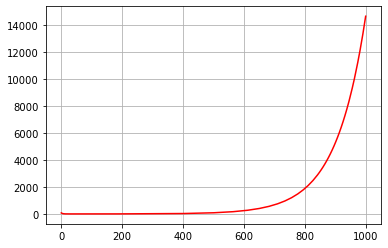

In [39]:
# Wybranie zbyt dużej wartości eta powoduje efekt przeciwny do zamierzonego - błąd rośnie.
# Dzieje się tak dlatego, ponieważ korygowanie wag odbywa się zbyt gwałtownie - wartość prawidłowa (to minimum do którego dążymy) jest przeskakiwana.
# Skoki są tak duże, że waga po korekcie jest faktycznie dalej od wartości poprawnej niż przed korektą - kontynuowanie tego
# procesu prowadzi do eskalacji błędu.
plot_loss_func(eta=0.01, iterations=1000)

w1: -0.4995588532230134, w2: 4.582930423174979, w0: -0.5602781943153319


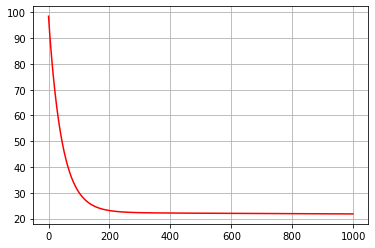

In [40]:
# W tym przypadku udało się osiągnąć minimum lokalne, dojście do minimum zajęło około 200 iteracji.
plot_loss_func(eta=0.001, iterations=1000)

w1: 0.786336153535477, w2: 1.3287084759600885, w0: 1.0862706647182214


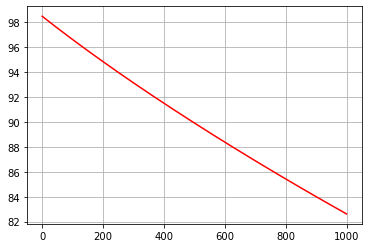

In [41]:
# Tym razem 1000 iteracji nie wystarczyło do osiągnięcia minimum lokalnego (nie widać wypłaszczenia na wykresie).
# Korekty były bardzo małe, aby dokończyć minimalizację wartości funkcji błędu
# należałoby kontynuować proces minimalizacji.
plot_loss_func(eta=0.00001, iterations=1000)

<h4> Zadanie4: Zazwyczaj nie wiemy z góry ile razy należy zmodyfikować wagi - kiedy dalsza aktualizacja nie przynosi efektu. Jednym z rozwiązań tego problemu jest sprawdzenie o jaki procent zmieniają sie aktualne wagi. Przyjmijmy, że jeżeli zmiana funkcji kosztu jest mniejsza niż 0,1% to przerywamy działanie. Ile kroków należałoby wykonać aby zrealizować poprzednie zadanie?

In [15]:
def minimize_with_threshold(w1, w2, w0, X, t, eta, threshold):
    loss_function_value_prev = loss_function(w1, w2, w0, X, t)
    w1, w2, w0 = update_weigths(w1, w2, w0, X, t, eta)
    
    loss_function_value_next = loss_function(w1, w2, w0, X, t)
    w1, w2, w0 = update_weigths(w1, w2, w0, X, t, eta)
    
    iterations_counter = 2 # Już na samym początku jestem po dwóch iteracjach

    while abs(loss_function_value_prev - loss_function_value_next) / loss_function_value_prev >= (threshold / 100):
        loss_function_value_prev = loss_function_value_next
        loss_function_value_next = loss_function(w1, w2, w0, X, t)
        w1, w2, w0 = update_weigths(w1, w2, w0, X, t, eta)
        iterations_counter += 1

    print(f"w1: {w1}, w2: {w2}, w0: {w0}, liczba iteracji: {iterations_counter}")


In [16]:
minimize_with_threshold(1, 1, 1, d2, target, eta=0.001, threshold=0.1)

w1: -0.3576140602330153, w2: 3.926772736279568, w0: 1.435178249925271, liczba iteracji: 193


Oczywiście w Pythonie istnieje implementacja metody regresji liniowej

In [17]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()
model.fit(d2, target);

In [20]:
model.coef_ #wspolczynnki dla zmiennych

array([-0.33471389,  7.82205511])

In [21]:
model.intercept_ #wyraz wolny

-22.89831572922505

<h4> Zadanie5: Porównaj te parametry z otrzymanymi z Zadania3. Z czego może wynikać ta różnica?

In [22]:
r_sq = model.score(d2, target) #R2 modelu
print(r_sq)
# W przypadku modeli regresji liniowej z modułu sklearn R^2 liczone jest inaczej niż to było w przypadku R^2 z ćwiczenia 3.
# (Z dokumentacji) Tutaj R^2 jest definiowane jako 1 - u/v gdzie: u = ((y_true - y_pred)** 2).sum(), v = ((y_true - y_true.mean()) ** 2).sum()
# Dobre modele osiągają R^2 -> 1 (max R^2). R^2 może być ujemne, w szczególności jest równe 0 dla stałej wartości przewidywanej (niezależnej od wejścia).

0.5362984005856313


In [23]:
y_pred = model.predict(d2) #przewidywane y
print(y_pred[:5])

[27.75850755 24.96067296 30.93672306 31.11074967 32.27623588]


In [24]:
# Wagi modelu z zadania 3: w1: -0.4995588532230134, w2: 4.582930423174979, w0: -0.5602781943153319
model_zad_3 = lambda x1, x2: -0.4995588532230134 * x1 + 4.582930423174979 * x2 - 0.5602781943153319

for x1, x2 in d2[:5]:
    print(model_zad_3(x1, x2))

# Widać, że wartości przewidywane przez oba modele są dość podobne.

28.418508387114993
25.334836960604505
28.836195803910186
30.422030607037
31.10488724009008


<h3> Co jeżeli dane nie są liniowe?

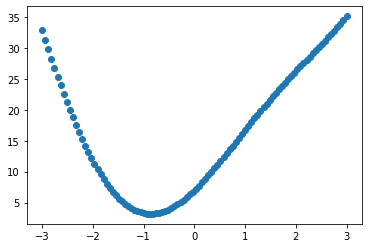

In [65]:
def non_linear(x):
    return 3*x**2+8*np.sin(x)+7

x = np.linspace(-3,3,100) #100 liczb z przedzialu [-3,3]
y = non_linear(x)

plt.scatter(x,y)
plt.show()

Załóżmy, że dane są tylko $x$ oraz $y$ oraz znana jest zależność między nimi, tzn $y=ax^2+b \sin x +c$, przy czym $a,b,c$ są nieznane.

In [24]:
x1 = x**2
x2 = np.sin(x)
X = np.vstack((x1, x2)).T #lącze je w tablice 2D
target = y

In [25]:
w1 = 1
w2 = 1
w0 = 1

l = []

for i in range(10000):
    l.append(loss_function(w1, w2, w0, X, target))
    w1, w2, w0 = update_weigths(w1, w2, w0, X, target, 0.001)

In [26]:
w1, w2, w0

(3.0137576012588307, 7.9607443561805535, 6.926150356697879)

Wniosek: Powyższa metoda może być stosowana także do nieliniowych funkcji.

<h3> Parametry modelu a hiperparametry

- parametry modelu ($w_1, w_2, w_0$)
- hiperparametry (np. $\eta$), są zewnętrzne wobec modelu

Dane zazwyczaj dzielimy na 2 lub 3 grupy - zbiór treningowy, zbiór walidacyjny oraz zbiór testowy.

Ogólnie:
- Na zbiorze treningowym uczymy parametrów modelu za pomocą metody spadku gradientu.
- Z użyciem zbioru walidacyjnego wybieramy najbardziej optymalne hiperparametry.
- Sprawdzamy wybrany zbiór parametrów i hiperparametrów na zbiorze testowym

<h4> Zadanie6: Rozważ jeszcze raz dane $d2/target$. 
    
- Podziel je na trzy podzbiory - treningowy (60%), walidacyjny (20%) oraz testowy (20%); najlepiej zdefiniuj odpowiednią funkcję. 
- Przetestuj różne wartości parametrów $\eta$ na zbiorze walidacyjnym, na tej podstawie wybierz jeden, który użyjesz do wytrenowania parametrów modelu na zbiórze treningowym. 
- Na końcu wyznacz wartość funkcji kosztu na zbiorze testowym. Skomentuj otrzymane wyniki.

In [42]:
from sklearn.model_selection import train_test_split

# Podział na zbiory:
X_train, X_rest, Y_train, Y_rest = train_test_split(d2, target, test_size=0.4, random_state=42)
X_validation, X_test, Y_validation, Y_test = train_test_split(X_rest, Y_rest, test_size=0.5, random_state=73)

print(f"Wielkość \'X_train\': {len(X_train)}")
print(f"Wielkość \'X_validation\': {len(X_validation)}")
print(f"Wielkość \'X_test\': {len(X_test)}")

Wielkość 'X_train': 303
Wielkość 'X_validation': 101
Wielkość 'X_test': 102


### Testowanie parametru $\eta$ na zbiorze walidacyjnym:

In [30]:
minimize_with_threshold(1, 1, 1, X_validation, Y_validation, 0.01, 0.05)
print(f"Wartość funkcji kosztu: {loss_function(-0.4881237254396048, 4.345465096941531, 1.0607740692591203, X_validation, Y_validation)}")

w1: -0.4881237254396048, w2: 4.345465096941531, w0: 1.0607740692591203, liczba iteracji: 40
Wartość funkcji kosztu: 20.03948108701905


In [34]:
minimize_with_threshold(1, 1, 1, X_validation, Y_validation, 0.005, 0.05)
print(f"Wartość funkcji kosztu: {loss_function(-0.4758895885417632, 4.286546760106486, 1.1818960836322556, X_validation, Y_validation)}")

w1: -0.4758895885417632, w2: 4.286546760106486, w0: 1.1818960836322556, liczba iteracji: 70
Wartość funkcji kosztu: 20.109747446610722


In [31]:
minimize_with_threshold(1, 1, 1, X_validation, Y_validation, 0.001, 0.05)
print(f"Wartość funkcji kosztu: {loss_function(-0.3999450486378196, 4.076227206316655, 1.3994802337519332, X_validation, Y_validation)}")

w1: -0.3999450486378196, w2: 4.076227206316655, w0: 1.3994802337519332, liczba iteracji: 247
Wartość funkcji kosztu: 20.590805401425804


In [32]:
minimize_with_threshold(1, 1, 1, X_validation, Y_validation, 0.0001, 0.05)
print(f"Wartość funkcji kosztu: {loss_function(-0.06639133106482055, 3.29377285881901, 1.4941594236988416, X_validation, Y_validation)}")

w1: -0.06639133106482055, w2: 3.29377285881901, w0: 1.4941594236988416, liczba iteracji: 1157
Wartość funkcji kosztu: 26.767207602872173


### Jakie $\eta$?
Wybieram $\eta$ = 0.01, dla tej wartości udało mi się uzyskać najmniejszą wartość funkcji
kosztu i bardzo szybką zbieżność (już po 40 iteracjach zmiana funkcji kosztu była mniejsza niż 0.05%)

In [35]:
# Trenowanie na zbiorze treningowym
minimize_with_threshold(1, 1, 1, X_train, Y_train, 0.01, 0.05)

w1: -0.42862772873169397, w2: 4.281883278488386, w0: 1.2037471078011455, liczba iteracji: 32


In [36]:
# Wyznaczenie wartości funkcji kosztu na zbiorze testowym:
print(f"Wartość funkcji kosztu: {loss_function(-0.42862772873169397, 4.281883278488386, 1.2037471078011455, X_validation, Y_validation)}")

Wartość funkcji kosztu: 20.31463718024878


### Wnioski:
- Przetestowanie wartości $\eta$ na mniejszym zbiorze walidacyjnym pozwoliło z dużą doładnością oszacować jak będzie wyglądał
proces uczenia na większym zbiorze treningowym - podobna liczba itereacji potrzebna do osiągnięcia minimum lokalnego.
- Po sprawdzeniu modelu na zbiorze testowym udało się osiągnąć podobną wartość funkcji kosztu jak na zbiorze walidacyjnym.

<h3> Uzupełnienie

In [27]:
#podstawowe statystyki

x = np.array([11,12,13,14,15,16,17,18,19,20])
print(np.mean(x), np.median(x), np.std(x), np.var(x), np.percentile(x, 90))

15.5 15.5 2.8722813232690143 8.25 19.1


In [28]:
#liczby losowe

print(np.random.uniform(0, 5, 10))
print()
print(np.random.normal(0, 5, 10))

[2.77926919 0.19755123 3.28876392 2.3597231  1.33932004 2.26689586
 3.76502066 4.53868377 0.1311207  4.1017045 ]

[ 3.21672822  5.06219779 -6.46172483 -1.68390651  3.02334778 -2.73453689
 -1.47148044 -0.95295645 -4.75853528 -0.10640448]


In [29]:
#pandas i normalizacja (x-mean)/sd

import pandas as pd
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = pd.DataFrame({"a":[1,2,6], "b":[0,5,-5]})
print(X)
print()
scaledX = scale.fit_transform(X)
print(scaledX)

   a  b
0  1  0
1  2  5
2  6 -5

[[-0.9258201   0.        ]
 [-0.46291005  1.22474487]
 [ 1.38873015 -1.22474487]]


In [30]:
#porownaj z wynikiem wyzej
v = np.array([1,2,6])
print((v - np.mean(v))/np.std(v))

[-0.9258201  -0.46291005  1.38873015]


In [31]:
#podzial tekstu na zbior testowy i treningowy
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)
print(X)
print()
print(list(y))
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print(X_train)
print()
print(X_test)
print()
print(y_train)
print()
print(y_test)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]

[0, 1, 2, 3, 4]

[[4 5]
 [0 1]
 [6 7]]

[[2 3]
 [8 9]]

[2, 0, 3]

[1, 4]
